In [ ]:
# requests is a Python library used to send HTTP requests easily.
# It allows you to fetch the content of a webpage programmatically.
# It is commonly used as the first step before parsing HTML with BeautifulSoup.

In [ ]:
import requests


In [ ]:
# Sending a Basic GET Request

In [17]:
import requests

A = requests.get("https://books.toscrape.com/")

# Print the HTML content
print(A)

<Response [200]>


In [ ]:
# a good practice is always make a html folder and add al the content in that 

In [38]:
for i in range (1,51):
  A = requests.get(f"https://books.toscrape.com/catalogue/page-{i}.html")  
  with open (f"htmls/page{i}.html" ,"w" ,encoding="utf-8") as f:
     f.write(A.text)
  # print(f"Downloaded page {i} successfully")

Downloaded page 1 successfully
Downloaded page 2 successfully
Downloaded page 3 successfully
Downloaded page 4 successfully
Downloaded page 5 successfully
Downloaded page 6 successfully
Downloaded page 7 successfully
Downloaded page 8 successfully
Downloaded page 9 successfully
Downloaded page 10 successfully
Downloaded page 11 successfully
Downloaded page 12 successfully
Downloaded page 13 successfully
Downloaded page 14 successfully
Downloaded page 15 successfully
Downloaded page 16 successfully
Downloaded page 17 successfully
Downloaded page 18 successfully
Downloaded page 19 successfully
Downloaded page 20 successfully
Downloaded page 21 successfully
Downloaded page 22 successfully
Downloaded page 23 successfully
Downloaded page 24 successfully
Downloaded page 25 successfully
Downloaded page 26 successfully
Downloaded page 27 successfully
Downloaded page 28 successfully
Downloaded page 29 successfully
Downloaded page 30 successfully
Downloaded page 31 successfully
Downloaded page 3

In [50]:
# for i in range (1,51):
#     B=requests.get("https://books.toscrape.com/catalogue/page-1.html")
#     with open (f"data.html","w",encoding="utf-8") as f:
#         f.write(B.text)
    

In [53]:
pip install beautifulsoup4 lxml

In [225]:
# from bs4 import BeautifulSoup
# for i in range(1,50):
    
#      with open(f"htmls/page{i}.html")as f:
#         content= f.read()
#      soup= BeautifulSoup(content,"html.parser")
#      data=soup.select("article.product_pod")

#        items=[]
#     for article in data:
#         title=article.find("h3").find("a")["title"]
#         prize=article.select_one("p.price_color").text.split("£")[1]
#         rating_element=article.select_one("p.star-rating")
#         rating=rating_element['class']
#         items.append([title,prize,rating])
            
from bs4 import BeautifulSoup
import pandas as pd

items = []

for i in range(1, 51):
    with open(f"htmls/page{i}.html", encoding="utf-8") as f:
        content = f.read()
    
    soup = BeautifulSoup(content, "html.parser")
    data = soup.select("article.product_pod")

    for article in data:
        title = article.find("h3").find("a")["title"]
        price = article.select_one("p.price_color").text.split("£")[1]
        rating_element=article.select_one("p.star-rating")
        rating=rating_element['class']
        items.append([title, price, rating])

# Convert to DataFrame
df = pd.DataFrame(items, columns=["Books", "Price", "Rating"])
print(df.head())  # Optional: See sample


                                   Books  Price                Rating
0                   A Light in the Attic  51.77  [star-rating, Three]
1                     Tipping the Velvet  53.74    [star-rating, One]
2                             Soumission  50.10    [star-rating, One]
3                          Sharp Objects  47.82   [star-rating, Four]
4  Sapiens: A Brief History of Humankind  54.23   [star-rating, Five]


In [241]:
import pandas as pd
dataa=pd.DataFrame(items ,columns=["Books","Prize","rating"])
dataa.head()

,Books,Prize,rating
0,A Light in the Attic,51.77,"[star-rating, Three]"
1,Tipping the Velvet,53.74,"[star-rating, One]"
2,Soumission,50.10,"[star-rating, One]"
3,Sharp Objects,47.82,"[star-rating, Four]"
4,Sapiens: A Brief History of Humankind,54.23,"[star-rating, Five]"


In [245]:
dataa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Books   1000 non-null   object
 1   Prize   1000 non-null   object
 2   rating  1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [247]:
dataa.describe()

,Books,Prize,rating
count,1000,1000,1000
unique,999,903,5
top,The Star-Touched Queen,44.18,"[star-rating, One]"
freq,2,3,226


<Axes: xlabel='Prize', ylabel='Books'>

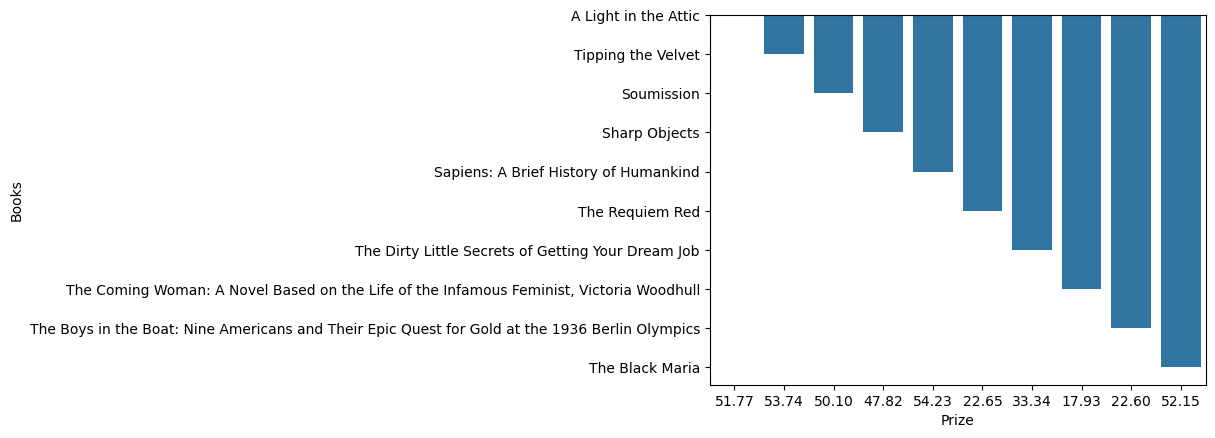

In [259]:
import seaborn as sns 
a = df.head(10)
sns.barplot(x=a["Prize"], y=a["Books"])
